In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from scipy.cluster import hierarchy

import sklearn
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X, Y = iris.data[:, [2,3]], iris.target

print("Dataset Features : ", iris.feature_names)
print("Dataset Target : ", iris.target_names)
print('Dataset Size : ', X.shape, Y.shape)

Dataset Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset Target :  ['setosa' 'versicolor' 'virginica']
Dataset Size :  (150, 2) (150,)


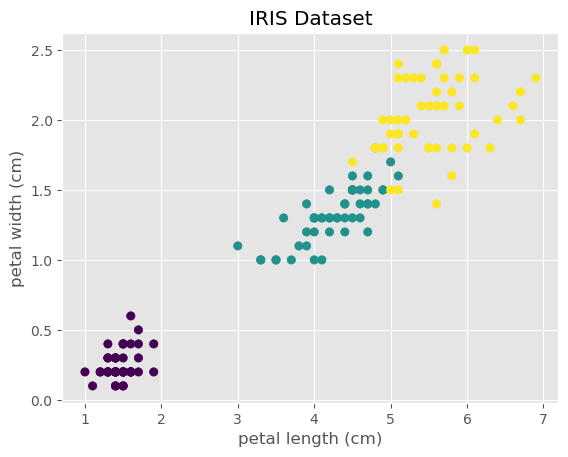

In [7]:
with plt.style.context("ggplot"):
    plt.scatter(X[:,0], X[:, 1], c=Y)
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.title("IRIS Dataset")

To understand agglomerative clustering & divisive clustering, we need to understand concepts of single linkage and complete linkage. Single linkage helps in deciding the similarity between 2 clusters which can then be merged into one cluster. Complete linkage helps with divisive clustering which is based on dissimilarity measures between clusters. Divisive Clustering chooses the object with the maximum average dissimilarity and then moves all objects to this cluster that are more similar to the new cluster than to the remainder.

**Single Linkage**: We take pairs of most similar samples in each cluster and merge 2 clusters that have the most similar 2 members into the new cluster.
**Complete Linkage**: We take pairs of most dissimilar samples in each cluster and then merge them into 2 clusters where dissimilarity distance is least.
**Average Linkage**: We take pairs of most similar samples in each cluster using average distance and merge 2 clusters which have the most similar 2 members into the new cluster.
**Ward**: Minimizes the sum of squared distance between all pairs of clusters. Its concept is the same as KMeans but the approach is hierarchical.

In [8]:
clusters = hierarchy.linkage(X, method="complete")

clusters[:10]

array([[  0.,   1.,   0.,   2.],
       [  4., 150.,   0.,   3.],
       [  2.,  36.,   0.,   2.],
       [  3.,   7.,   0.,   2.],
       [  8., 151.,   0.,   4.],
       [  6.,  17.,   0.,   2.],
       [ 10., 153.,   0.,   3.],
       [ 28., 154.,   0.,   5.],
       [  9.,  32.,   0.,   2.],
       [ 27., 156.,   0.,   4.]])

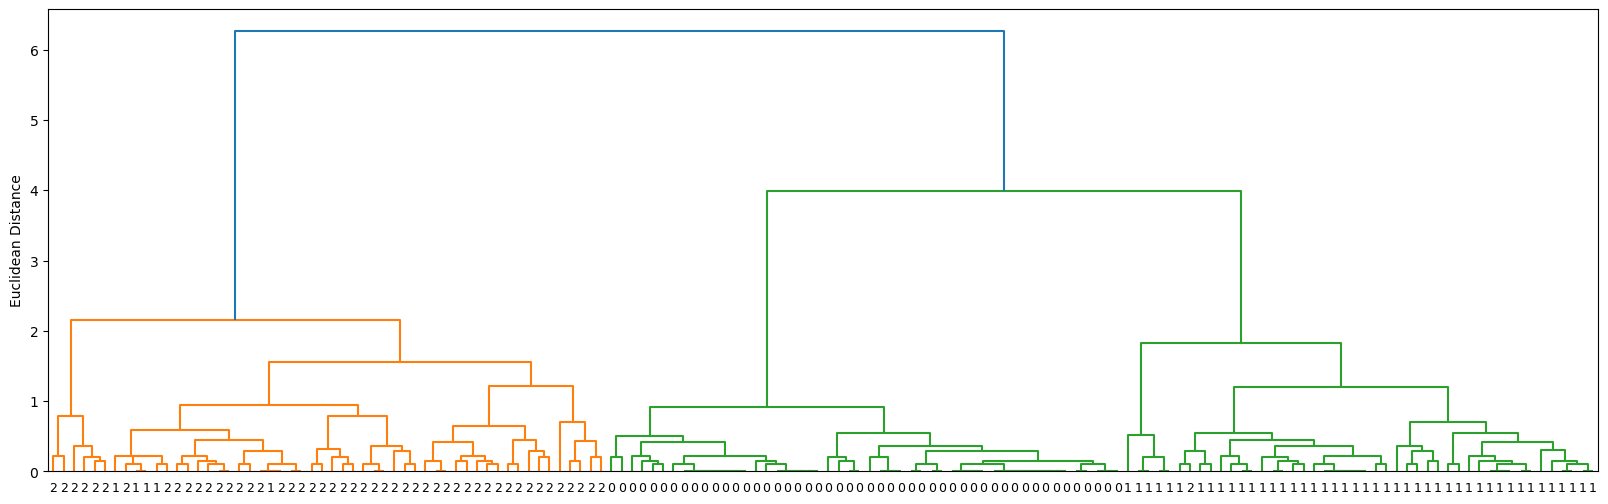

In [12]:
def plot_dendrogram(clusters):
    plt.figure(figsize=(20,6))
    dendrogram = hierarchy.dendrogram(clusters, labels=Y, orientation="top",leaf_font_size=9, leaf_rotation=360)
    plt.ylabel('Euclidean Distance');
    plt.show()

plot_dendrogram(clusters)

# **Your Turn**

Use the documentation for the hierarchy function to perform hierarchical clustering with single, average, and ward linkages. Plot the output for each clustering model. Do so similarly to the code above. What differences do you see?

**Single Linkage**

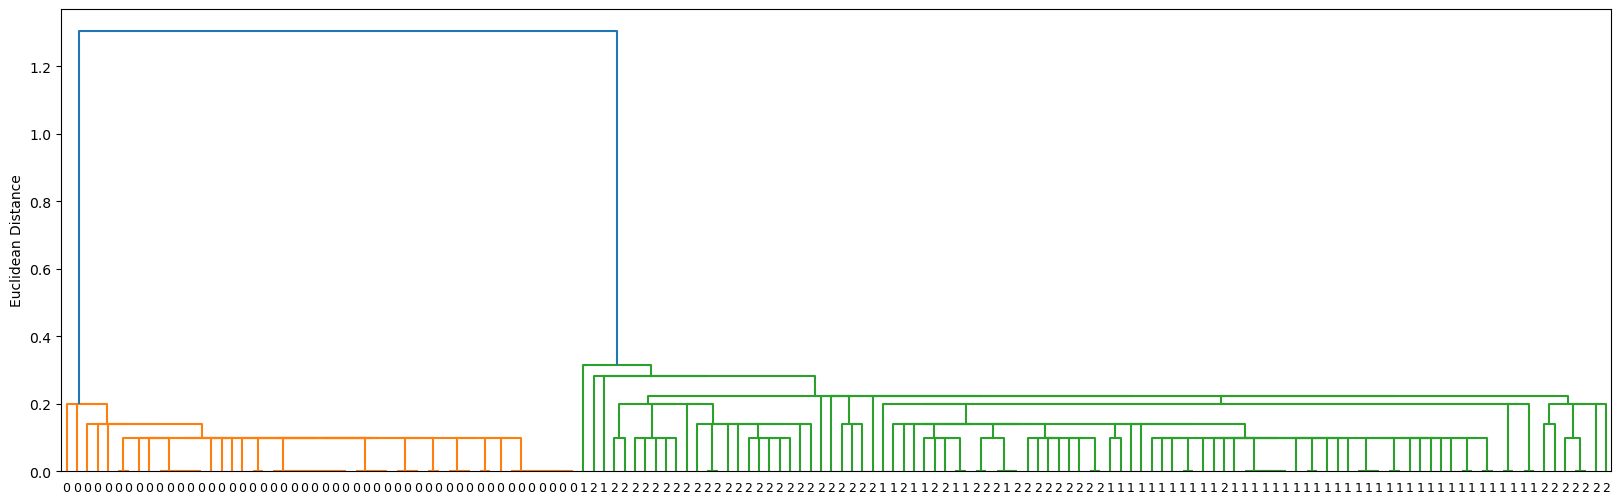

In [13]:
single = hierarchy.linkage(y=X, method='single', metric='euclidean')
plot_dendrogram(single)

**Average**

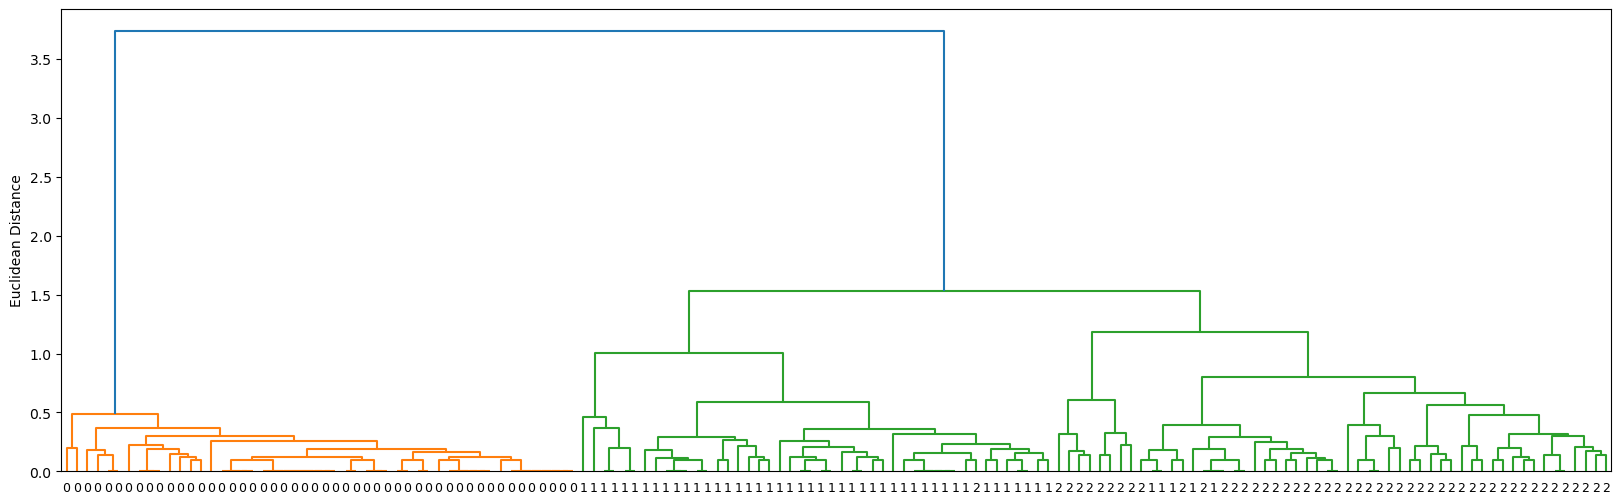

In [14]:
average = hierarchy.linkage(y=X, method='average', metric='euclidean')
plot_dendrogram(average)

**Ward**

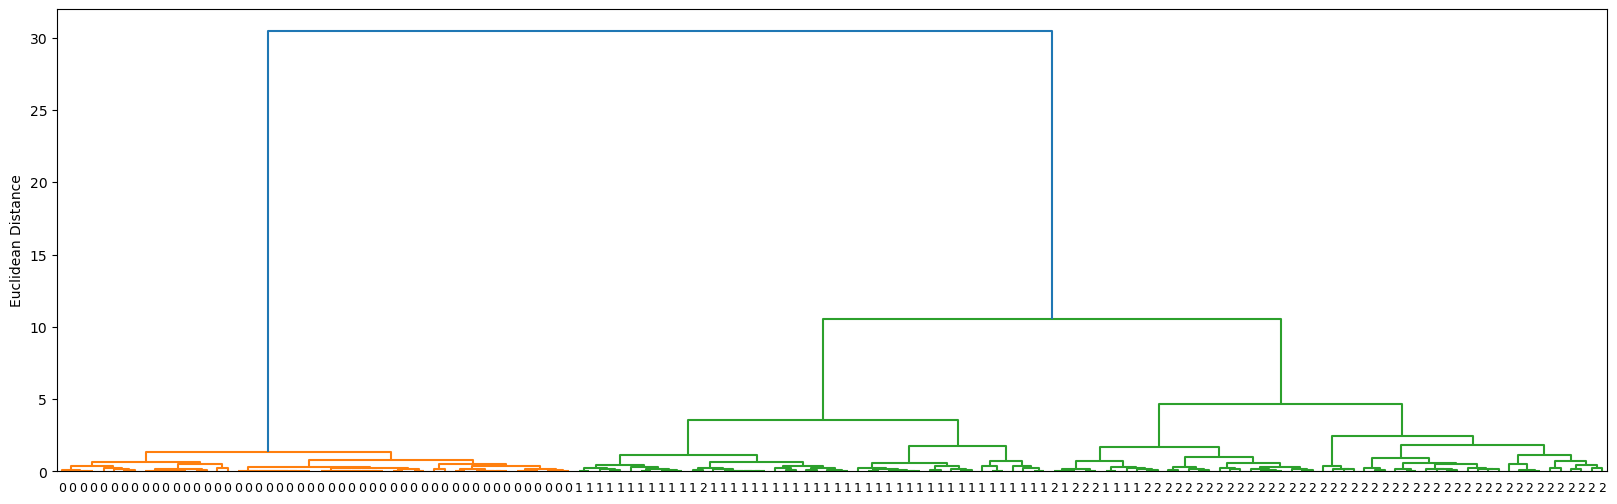

In [16]:
ward = hierarchy.linkage(y=X, method='ward', metric='euclidean')
plot_dendrogram(ward)

 It can be observed that, the Euclidean distance for **Single Linkage** has the lowest value, followed by the **Average Linkage** and then the **Complete Linkage**.
 **Ward** has the highest euclidean value, and that's probably because it does not directly define a measure of distance between two points or clusters.